1\. **PCA on 3D dataset**

* Generate a dataset simulating 3 features, each with N entries (N being ${\cal O}(1000)$). Each feature is made by random numbers generated according the normal distribution $N(\mu,\sigma)$ with mean $\mu_i$ and standard deviation $\sigma_i$, with $i=1, 2, 3$. Generate the 3 variables $x_{i}$ such that:
    * $x_1$ is distributed as $N(0,1)$
    * $x_2$ is distributed as $x_1+N(0,3)$
    * $x_3$ is given by $2x_1+x_2$
* Find the eigenvectors and eigenvalues using the eigendecomposition of the covariance matrix
* Find the eigenvectors and eigenvalues using the SVD. Check that the two procedures yield to same result
* What percent of the total dataset's variability is explained by the principal components? Given how the dataset was constructed, do these make sense? Reduce the dimensionality of the system so that at least 99% of the total variability is retained
* Redefine the data according to the new basis from the PCA
* Plot the data, in both the original and the new basis. The figure should have 2 rows (the original and the new basis) and 3 columns (the $[x_0, x_1]$, $[x_0, x_2]$ and $[x_1, x_2]$ projections) of scatter plots.

In [157]:
#import all needed packages
import numpy as np
from scipy import linalg as la
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns

In [158]:
#Task 1
n = 1000
#normal distribution 
np.random.seed(1234)
x1 = np.random.normal(0,1,n)
x2= x1+ np.random.normal(0,3,n)
x3= 2 * x1 + x2 
#we defined 3 features, but now, we should form one data set based on this data set
#because 
X=np.array([x1,x2,x3])#it has to be transposed, but on this way we got transposed matrix 3x1000


In [159]:
print(X.size)
print(X)

3000
[[ 0.47143516 -1.19097569  1.43270697 ...  0.32753233  0.7408138
  -0.80190505]
 [-4.27518883 -6.05154634  1.57239264 ...  2.67192101  7.1822691
  -3.52695664]
 [-3.3323185  -8.43349773  4.43780658 ...  3.32698567  8.6638967
  -5.13076673]]


In [160]:
#find eigenvalues and eigenvectors using eigendecomposition of the cov matrix
cov=np.cov(X)
print("Covariance matrix:\n", cov, '\n')
# now find the eigenvectors of the covariance matrix
l, V = la.eig(cov)
# take only the real component, if possible
l = np.real_if_close(l)
print("Eigendecomposition:")
print("Eigenvalues:\n", l, '\n')
print("Eigenvectors:\n", V, '\n')


Covariance matrix:
 [[ 0.94780563  0.97706169  2.87267296]
 [ 0.97706169  9.85517837 11.80930174]
 [ 2.87267296 11.80930174 17.55464765]] 

Eigendecomposition:
Eigenvalues:
 [2.64557028e+01 5.12666981e-16 1.90192884e+00] 

Eigenvectors:
 [[-0.11305445 -0.81649658  0.56617314]
 [-0.5803632  -0.40824829 -0.704636  ]
 [-0.8064721   0.40824829  0.42771029]] 



In [161]:
#find eigenvalues and eigenvectors using svd
U, S, Vt = np.linalg.svd(X)

# Rescale the SVD spectrum to get the eigenvalues
l_svd = S**2/(n-1)
print(l_svd)
# The matrix U already contains the eigenvectors
V_svd = U
print(V_svd)

[2.65053699e+01 1.90220668e+00 2.06064656e-31]
[[-0.11296888  0.56619022 -0.81649658]
 [-0.58046969 -0.70454827 -0.40824829]
 [-0.80640745  0.42783217  0.40824829]]


In [162]:
#Check if these two approaches give the same result:

#Just print here eigenvectors and eigenvalues got in 2 ways
print('Eigenvalues: Eigendecomposition \n',l)
print('Eigenvalues: SVD \n',l_svd)
print('Eigenvectors: Eigendecomposition \n',V)
print('Eigenvectors: SVD \n',V_svd)

print('\nThe two methods lead to the same eigenvectors and eigenvalues, there is just small differences due to the precision in the representation for small numbers .')



Eigenvalues: Eigendecomposition 
 [2.64557028e+01 5.12666981e-16 1.90192884e+00]
Eigenvalues: SVD 
 [2.65053699e+01 1.90220668e+00 2.06064656e-31]
Eigenvectors: Eigendecomposition 
 [[-0.11305445 -0.81649658  0.56617314]
 [-0.5803632  -0.40824829 -0.704636  ]
 [-0.8064721   0.40824829  0.42771029]]
Eigenvectors: SVD 
 [[-0.11296888  0.56619022 -0.81649658]
 [-0.58046969 -0.70454827 -0.40824829]
 [-0.80640745  0.42783217  0.40824829]]

The two methods lead to the same eigenvectors and eigenvalues, there is just small differences due to the precision in the representation for small numbers .


In [163]:
#Checking how much variability 
Lambda = np.diag(l)
print("Lambda:\n", Lambda, '\n')
print("Trace(X):\n", cov.trace(), '\n')
print("Trace(Lambda):\n", Lambda.trace(), '\n')
print(Lambda)
print("By selecting the first component (component 0), we retain %.2f%% of the total variability" % (Lambda[0, 0]/Lambda.trace()*100))
print("By selecting the component 1, we retain %.2f%% of the total variability" % (Lambda[1, 1]/Lambda.trace()*100))
print("By selecting the component 2, we retain %.2f%% of the total variability" % (Lambda[2, 2]/Lambda.trace()*100))

print("By selecting the components 0 and 2, we retain %.2f%% of the total variability" % ((Lambda[0, 0]+Lambda[2,2])/Lambda.trace()*100))

#Comment:
#Results we got are not surprising, because other two components are made from the first one.
#Therefore, it is logical that the first component describes the most of the variability, 93.29% in this case
#With components 0 and 2, which represents (x1 and x2 eqs) we can describe the 100% of variability
#Therefore, keeping the 2 highest eigenvalues for component 0 and component 1 we describe 100% of variability. 
#This fulfil requirement that at least 99% of variability is explained

#prva varijabla ima visok nivo varijabiliteta, jer su druge dve varijable napravljene od nje


Lambda:
 [[2.64557028e+01 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 5.12666981e-16 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 1.90192884e+00]] 

Trace(X):
 28.35763165920515 

Trace(Lambda):
 28.35763165920512 

[[2.64557028e+01 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 5.12666981e-16 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 1.90192884e+00]]
By selecting the first component (component 0), we retain 93.29% of the total variability
By selecting the component 1, we retain 0.00% of the total variability
By selecting the component 2, we retain 6.71% of the total variability
By selecting the components 0 and 2, we retain 100.00% of the total variability


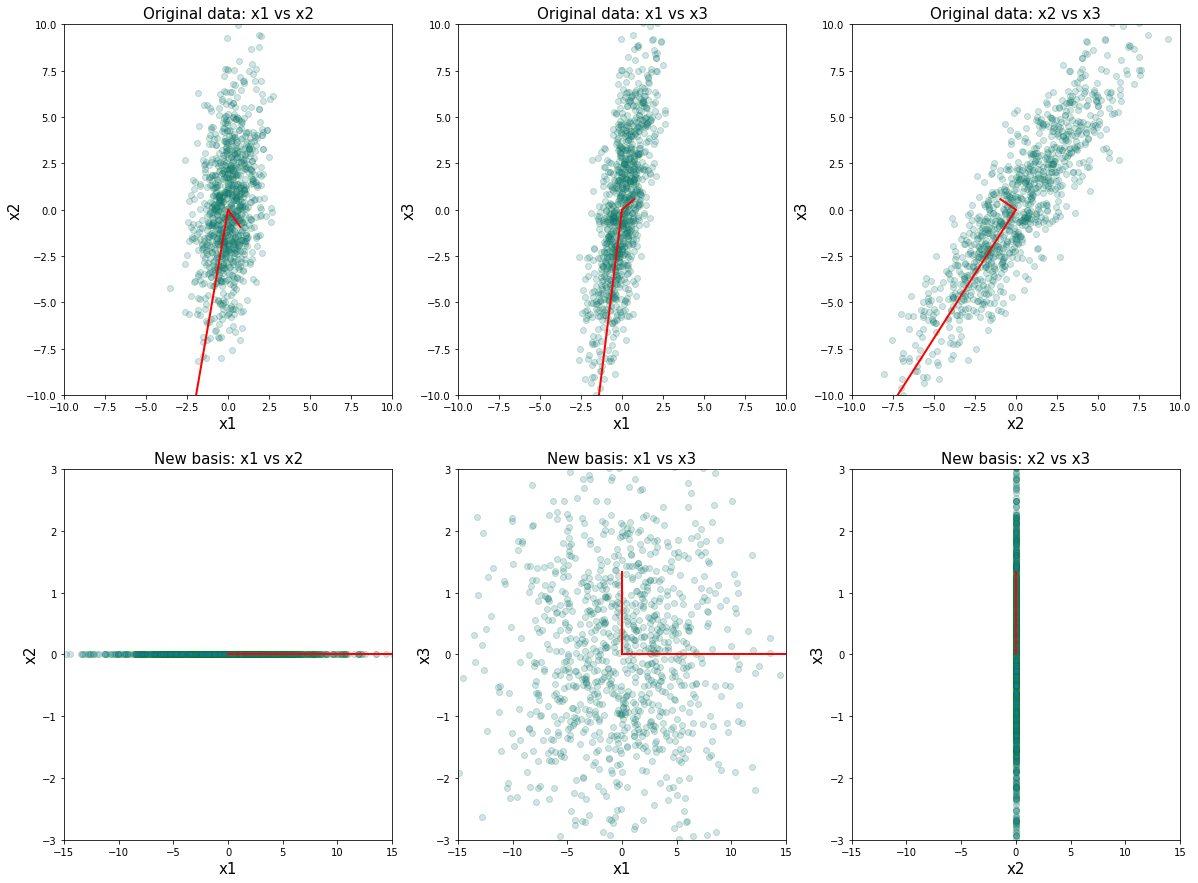

In [164]:
# rotate all the data points accordingly to the new base by multiplying by the transpose of matrix V
#V represents eigenvectors

Xp = np.dot(V.T, X)#X is our data set 
#eigen vectors are orthogonical vectors

#Graphical representations:
# Graphically represent the eigenvectors rescaled by the eigenvalues
# the original data distribution
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(20, 15))
ax[0,0].scatter(X[0,:],X[1,:],alpha=0.2,marker='o', edgecolor='green')
ax[0,0].set_title('Original data: x1 vs x2', fontsize=15)
# a scale factor to graphically enhance the lines - only for visualization purposes
scale_factor = 0.7

for li, vi in zip(l, V.T):
    # the line is defined by specifying its beginning and its end 
    ax[0,0].plot([0, scale_factor * li * vi[0]], [0, scale_factor * li * vi[1]], 'r-', lw=2)
#mora ovde da se postavi ovaj opseg inace izgleda cudno    
ax[0,0].axis([-10,10,-10,10]);
ax[0,0].set_xlabel('x1', fontsize=15)
ax[0,0].set_ylabel('x2', fontsize=15)
#[-21,21,-21,21]   


ax[0,1].scatter(X[0,:],X[2,:],alpha=0.2,marker='o', edgecolor='green')
ax[0,1].set_title('Original data: x1 vs x3', fontsize=15)
for li, vi in zip(l, V.T):
    # the line is defined by specifying its beginning and its end 
    ax[0,1].plot([0, scale_factor * li * vi[0]], [0, scale_factor * li * vi[2]], 'r-', lw=2)
ax[0,1].axis([-10,10,-10,10]);
ax[0,1].set_xlabel('x1', fontsize=15)
ax[0,1].set_ylabel('x3', fontsize=15)

    
ax[0,2].scatter(X[1,:],X[2,:],alpha=0.2,marker='o', edgecolor='green')
ax[0,2].set_title('Original data: x2 vs x3', fontsize=15)

for li, vi in zip(l, V.T):
    # the line is defined by specifying its beginning and its end 
    ax[0,2].plot([0, scale_factor * li * vi[1]], [0, scale_factor * li * vi[2]], 'r-', lw=2)
ax[0,2].axis([-10,10,-10,10]);
ax[0,2].set_xlabel('x2', fontsize=15)
ax[0,2].set_ylabel('x3', fontsize=15)

#New basis

ax[1,0].scatter(Xp[0,:],Xp[1,:],alpha=0.2,marker='o', edgecolor='green')
ax[1,0].set_title('New basis: x1 vs x2', fontsize=15)
ax[1,0].set_xlabel('x1', fontsize=15)
ax[1,0].set_ylabel('x2', fontsize=15)


for li, vi in zip(l, np.dot(V.T, V)):
    # the line is defined by specifying its beginning and its end 
    ax[1,0].plot([0, scale_factor * li * vi[0]], [0, scale_factor * li * vi[1]], 'r-', lw=2)


ax[1,0].axis([-15,15,-3,3]);    
    
ax[1,1].scatter(Xp[0,:],Xp[2,:],alpha=0.2,marker='o', edgecolor='green')
ax[1,1].set_title('New basis: x1 vs x3', fontsize=15)
ax[1,1].set_xlabel('x1', fontsize=15)
ax[1,1].set_ylabel('x3', fontsize=15)


for li, vi in zip(l, np.dot(V.T, V)):
    # the line is defined by specifying its beginning and its end 
    ax[1,1].plot([0, scale_factor * li * vi[0]], [0, scale_factor * li * vi[2]], 'r-', lw=2)
ax[1,1].axis([-15,15,-3,3]);    
    
    
ax[1,2].scatter(Xp[1,:],Xp[2,:],alpha=0.2,marker='o', edgecolor='green')
ax[1,2].set_title('New basis: x2 vs x3', fontsize=15)
ax[1,2].set_xlabel('x2', fontsize=15)
ax[1,2].set_ylabel('x3', fontsize=15)
for li, vi in zip(l, np.dot(V.T, V)):
    # the line is defined by specifying its beginning and its end 
    ax[1,2].plot([0, scale_factor * li * vi[1]], [0, scale_factor * li * vi[2]], 'r-', lw=2)
ax[1,2].axis([-15,15,-3,3]);   
    


plt.show()

#Comment: 


2\. **PCA on a nD dataset**

* Start from the dataset you have genereted in the previous exercise and add uncorrelated random noise. Such noise should be represented by other 10 uncorrelated variables normally distributed, with a standard deviation much smaller (e.g. a factor 20) than those used to generate the $x_1$ and $x_2$. Repeat the PCA procedure and compare the results with what you have obtained before.

In [165]:
#10 uncorrelated random variables which represents noise

x10 = np.random.normal(0,1/20,n)
x11 = np.random.normal(0,1/25,n)
x12 = np.random.normal(0,1/23,n)
x13 = np.random.normal(0,3/24,n)
x14 = np.random.normal(0,1/20,n)
x15 = np.random.normal(0,1/27,n)
x16 = np.random.normal(0,3/25,n)
x17 = np.random.normal(0,1/20,n)
x18 = np.random.normal(0,1/24,n)
x19 = np.random.normal(0,1/22,n)


X2=np.array([x1,x2,x3,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19])
print(X2.size)

"""
x11=np.concatenate((x1, np.random.normal(0,1/20,10)), axis=None)
x21=np.concatenate((x2, np.random.normal(0,3/20,10)), axis=None)
x31=2*x1+x2
X1=np.array([x11,x21,x31])
#print(x1.size)
"""

13000


'\nx11=np.concatenate((x1, np.random.normal(0,1/20,10)), axis=None)\nx21=np.concatenate((x2, np.random.normal(0,3/20,10)), axis=None)\nx31=2*x1+x2\nX1=np.array([x11,x21,x31])\n#print(x1.size)\n'

In [166]:
#print(X1.shape)
print(X2.shape)

(13, 1000)


In [167]:
#find eigenvalues and eigenvectors using eigendecomposition of the cov matrix
cov1=np.cov(X2)
#print("Covariance matrix:\n", cov1, '\n')
# now find the eigenvectors of the covariance matrix
l1, V1 = la.eig(cov1)
# take only the real component, if possible
l1 = np.real_if_close(l1)
print("Eigendecomposition:")
print("Eigenvalues:\n", l1, '\n')
print("Eigenvectors:\n", V1, '\n')


Eigendecomposition:
Eigenvalues:
 [ 2.64557427e+01  1.90196869e+00  1.57093297e-02  1.48154867e-02
 -1.60165635e-17  2.55126656e-03  2.41881432e-03  2.29897329e-03
  1.43298130e-03  1.52139555e-03  1.67779700e-03  2.05812840e-03
  1.95297813e-03] 

Eigenvectors:
 [[-1.13054396e-01  5.66167080e-01 -2.11826384e-03  4.52907067e-04
  -8.16496581e-01  8.36898263e-04  4.92629273e-04 -1.90822564e-04
   2.47300612e-04  3.26425370e-04  3.86236479e-04  9.24632218e-04
   1.75542900e-04]
 [-5.80362723e-01 -7.04629062e-01  2.23381381e-03 -2.55121722e-04
  -4.08248290e-01 -1.57295099e-03 -5.14905755e-04  6.83853259e-04
  -3.02078902e-04 -3.39593419e-04 -5.28009162e-04 -1.19890034e-03
  -3.79080084e-04]
 [-8.06471516e-01  4.27705098e-01 -2.00271386e-03  6.50692412e-04
   4.08248290e-01  1.00845536e-04  4.70352790e-04  3.02208130e-04
   1.92522322e-04  3.13257321e-04  2.44463796e-04  6.50364097e-04
  -2.79942844e-05]
 [-6.21014386e-04 -8.73121248e-05 -5.45933834e-03 -1.62934283e-05
   2.37392109e-15  

In [168]:
#SVD procedure
#find eigenvalues and eigenvectors using svd
U1, S1, Vt1 = np.linalg.svd(X2)

# Rescale the SVD spectrum to get the eigenvalues
l1svd = S1**2/(1010-1)
print(l1svd)
# The matrix U already contains the eigenvectors
V1_svd= U1
print(V1_svd)
#Compare results with dataset without noise!

[2.62427209e+01 1.88339372e+00 1.55539007e-02 1.46687293e-02
 2.52616687e-03 2.39957293e-03 2.27884980e-03 2.03775223e-03
 1.93523174e-03 1.66199578e-03 1.50682278e-03 1.41883791e-03
 9.88981962e-32]
[[-1.12968821e-01  5.66184167e-01 -2.11609718e-03  4.54369762e-04
   8.36083740e-04 -4.81302922e-04  2.12156040e-04 -9.25766888e-04
   1.81097572e-04  3.88197361e-04  3.24904419e-04  2.48512365e-04
   8.16496581e-01]
 [-5.80469205e-01 -7.04541335e-01  2.22797836e-03 -2.58592450e-04
  -1.57683100e-03  4.76851032e-04 -7.16811805e-04  1.20091408e-03
  -3.90117658e-04 -5.33941317e-04 -3.34965825e-04 -3.04467504e-04
   4.08248290e-01]
 [-8.06406847e-01  4.27826999e-01 -2.00421601e-03  6.50147073e-04
   9.53364815e-05 -4.85754812e-04 -2.92499725e-04 -6.50619692e-04
  -2.79225136e-05  2.42453404e-04  3.14843014e-04  1.92557226e-04
  -4.08248290e-01]
 [-6.38818437e-04 -1.05761175e-04 -5.37709311e-03  3.19472230e-05
   5.91165699e-01  7.77015310e-01  1.40067318e-01  1.51674217e-01
  -1.95785286e-02

In [169]:
#Checking how much variability 
Lambda1 = np.diag(l1)
print("Trace(X1):\n", cov1.trace(), '\n')
print("Trace(Lambda):\n", Lambda1.trace(), '\n')

for i in range(0, len(Lambda1)):
    print("By selecting the component x%i, we retain %.2f%% of the total variability" % ((i),(Lambda1[i, i]/Lambda1.trace()*100)))

#print("By selecting the component 0, we retain %.2f%% of the total variability" % (Lambda1[0, 0]/Lambda1.trace()*100))

#Comment :
#firts two components represents 99.84% varaibility of the dataset



Trace(X1):
 28.40414850266914 

Trace(Lambda):
 28.40414850266911 

By selecting the component x0, we retain 93.14% of the total variability
By selecting the component x1, we retain 6.70% of the total variability
By selecting the component x2, we retain 0.06% of the total variability
By selecting the component x3, we retain 0.05% of the total variability
By selecting the component x4, we retain -0.00% of the total variability
By selecting the component x5, we retain 0.01% of the total variability
By selecting the component x6, we retain 0.01% of the total variability
By selecting the component x7, we retain 0.01% of the total variability
By selecting the component x8, we retain 0.01% of the total variability
By selecting the component x9, we retain 0.01% of the total variability
By selecting the component x10, we retain 0.01% of the total variability
By selecting the component x11, we retain 0.01% of the total variability
By selecting the component x12, we retain 0.01% of the total var

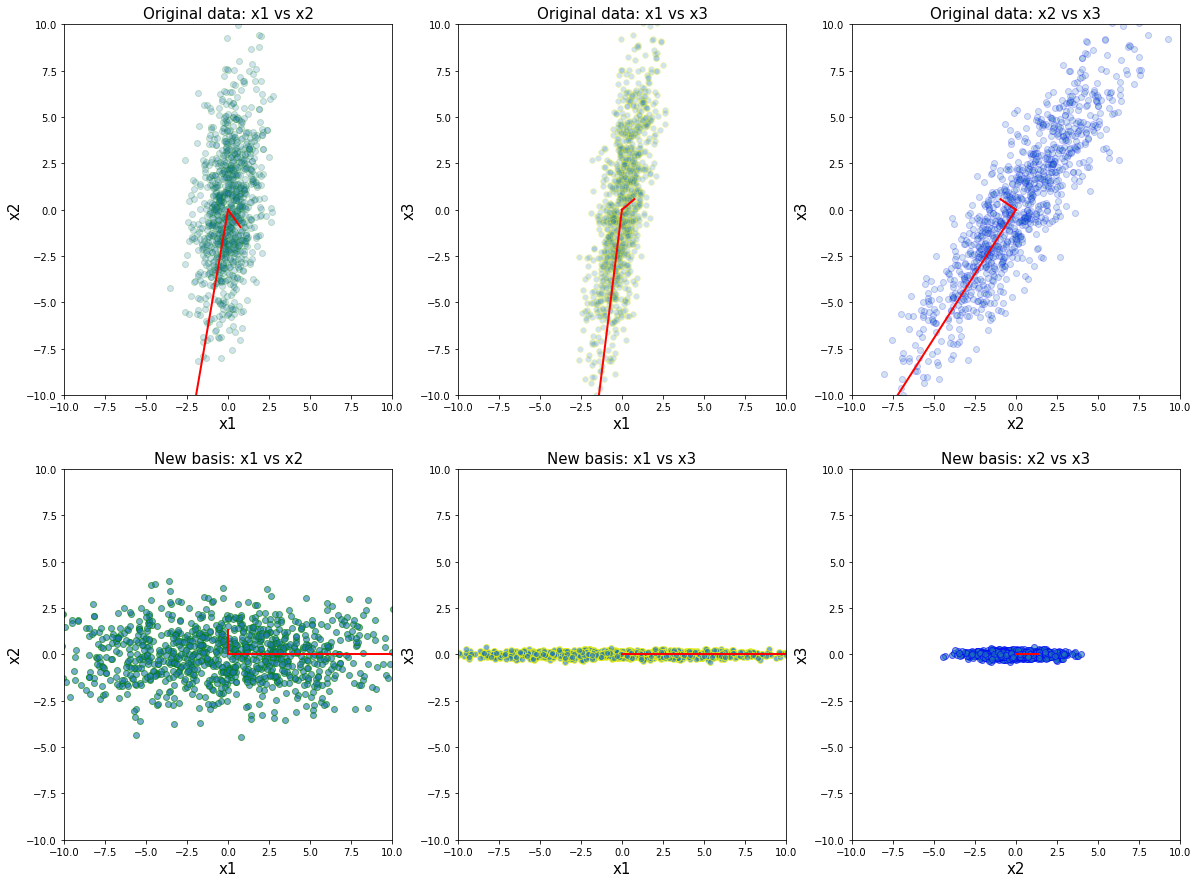

In [170]:
#Graphically representation:

# rotate all the data points accordingly to the new base by multiplying by the transpose of matrix V
Xp1 = np.dot(V1.T, X2)#X is our data set 
#eigen vectors are orthogonical vectors

#Graphical representations:
# Graphically represent the eigenvectors rescaled by the eigenvalues
# the original data distribution
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(20, 15))
ax[0,0].scatter(X2[0,:],X2[1,:],alpha=0.2,marker='o', edgecolor='green')
ax[0,0].set_title('Original data: x1 vs x2', fontsize=15)
ax[0,0].set_xlabel('x1', fontsize=15)
ax[0,0].set_ylabel('x2', fontsize=15)
for li, vi in zip(l1, V1.T):
    # the line is defined by specifying its beginning and its end 
    ax[0,0].plot([0, scale_factor * li * vi[0]], [0, scale_factor * li * vi[1]], 'r-', lw=2)
ax[0,0].axis([-10,10,-10,10])

# a scale factor to graphically enhance the lines - only for visualization purposes
scale_factor = 0.7
ax[0,1].scatter(X2[0,:],X2[2,:],alpha=0.2,marker='o', edgecolor='yellow')
ax[0,1].set_title('Original data: x1 vs x3', fontsize=15)
ax[0,1].set_xlabel('x1', fontsize=15)
ax[0,1].set_ylabel('x3', fontsize=15)
for li, vi in zip(l1, V1.T):
    # the line is defined by specifying its beginning and its end 
    ax[0,1].plot([0, scale_factor * li * vi[0]], [0, scale_factor * li * vi[2]], 'r-', lw=2)
ax[0,1].axis([-10,10,-10,10])


ax[0,2].scatter(X2[1,:],X2[2,:],alpha=0.2,marker='o', edgecolor='blue')
ax[0,2].set_title('Original data: x2 vs x3', fontsize=15)
ax[0,2].set_xlabel('x2', fontsize=15)
ax[0,2].set_ylabel('x3', fontsize=15)
for li, vi in zip(l1, V1.T):
    # the line is defined by specifying its beginning and its end 
    ax[0,2].plot([0, scale_factor * li * vi[1]], [0, scale_factor * li * vi[2]], 'r-', lw=2)
ax[0,2].axis([-10,10,-10,10])


#New basis

ax[1,0].scatter(Xp1[0,:],Xp1[1,:],alpha=0.6,marker='o', edgecolor='green')
ax[1,0].set_title('New basis: x1 vs x2', fontsize=15)
ax[1,0].set_xlabel('x1', fontsize=15)
ax[1,0].set_ylabel('x2', fontsize=15)

for li, vi in zip(l1, np.dot(V1.T, V1)):
    # the line is defined by specifying its beginning and its end 
    ax[1,0].plot([0, scale_factor * li * vi[0]], [0, scale_factor * li * vi[1]], 'r-', lw=2)
ax[1,0].axis([-10,10,-10,10])


ax[1,1].scatter(Xp1[0,:],Xp1[2,:],alpha=0.6,marker='o', edgecolor='yellow')
ax[1,1].set_title('New basis: x1 vs x3', fontsize=15)
ax[1,1].set_xlabel('x1', fontsize=15)
ax[1,1].set_ylabel('x3', fontsize=15)

for li, vi in zip(l1, np.dot(V1.T, V1)):
    # the line is defined by specifying its beginning and its end 
    ax[1,1].plot([0, scale_factor * li * vi[0]], [0, scale_factor * li * vi[2]], 'r-', lw=2)
ax[1,1].axis([-10,10,-10,10])


ax[1,2].scatter(Xp1[1,:],Xp1[2,:],alpha=0.6,marker='o', edgecolor='blue')
ax[1,2].set_title('New basis: x2 vs x3', fontsize=15)
ax[1,2].set_xlabel('x2', fontsize=15)
ax[1,2].set_ylabel('x3', fontsize=15)

for li, vi in zip(l1, np.dot(V1.T, V1)):
    # the line is defined by specifying its beginning and its end 
    ax[1,2].plot([0, scale_factor * li * vi[1]], [0, scale_factor * li * vi[2]], 'r-', lw=2)
ax[1,2].axis([-10,10,-10,10])



plt.show()
#Comment: the first plane contains the most of the information after rotation
#Narrow lines are more spread due noise additions
#However unccorelated random noise did not have a significant effect on the resulting principal components.
#The reason why it did not effected PCA is because presence of uncorrelated noise will not affect the overall patterns in the correlated features, 
#because PCA operates by finding directions of maximum varieance of data


3\. **Optional**: **PCA on the MAGIC dataset**

Perform a PCA on the magic04.data dataset.

In [171]:
# get the dataset and its description on the proper data directory
#!wget https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.data -P data/
#!wget https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.names -P data/ 

In [172]:
file_name='magic04.data'
#.data means it is a binary file, we want to convert it to the csv
df=pd.read_csv(file_name, names=['fLength', 'fWidth', 'fSize', 'fConc', 'fConc1', 'fAsym', 'fM3Long', 'fM3Trans', 'fAlpha', 'fDist','fCategory'])
names=['fLength', 'fWidth', 'fSize', 'fConc', 'fConc1', 'fAsym', 'fM3Long', 'fM3Trans', 'fAlpha', 'fDist','fCategory']
df
df
df1=df.iloc[:,:-1] #we deleted last features because it is not numerical variable 
df1
#name of the columns represents features
#rows represent observations

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620
...,...,...,...,...,...,...,...,...,...,...
19015,21.3846,10.9170,2.6161,0.5857,0.3934,15.2618,11.5245,2.8766,2.4229,106.8258
19016,28.9452,6.7020,2.2672,0.5351,0.2784,37.0816,13.1853,-2.9632,86.7975,247.4560
19017,75.4455,47.5305,3.4483,0.1417,0.0549,-9.3561,41.0562,-9.4662,30.2987,256.5166
19018,120.5135,76.9018,3.9939,0.0944,0.0683,5.8043,-93.5224,-63.8389,84.6874,408.3166


In [173]:
#calculate covariance matrix
cov2=np.cov(df1, rowvar=False)#with rowvar setting to be false, we are adressing that variables are represented as columns!
print("Covariance matrix:\n", cov2.shape, '\n')
# now find the eigenvectors of the covariance matrix
l2, V2 = la.eig(cov2)
# take only the real component, if possible
l2 = np.real_if_close(l2)
print("Eigendecomposition:")
print("Eigenvalues:\n", l2, '\n')
print("Eigenvectors:\n", V2, '\n')


Covariance matrix:
 (10, 10) 

Eigendecomposition:
Eigenvalues:
 [6.57979140e+03 3.85387048e+03 2.01638313e+03 1.32675968e+03
 6.10187259e+02 4.33599171e+02 1.17330074e+02 8.63965822e-02
 1.07363851e-02 3.85322858e-04] 

Eigenvectors:
 [[-3.27812305e-01 -1.34406332e-01  6.55078481e-02  8.63988253e-01
   9.45511967e-02 -1.98552026e-02  3.38166662e-01  3.99907112e-03
  -4.54836725e-04  4.57080123e-05]
 [-1.13810001e-01 -5.38837224e-02 -1.89938175e-02  3.19766485e-01
  -1.97548493e-02  2.32592322e-02 -9.38307839e-01  1.33847863e-02
   6.74902809e-04 -5.73158422e-05]
 [-3.06076690e-03  6.59372017e-04  1.05931761e-03  6.93028658e-03
   2.65185255e-03  1.33441545e-04 -1.08823228e-02 -9.27765187e-01
  -3.72229862e-01  2.26331399e-02]
 [ 9.27109146e-04 -2.58205308e-04 -5.10399700e-04 -2.60555110e-03
  -1.53899865e-03 -3.46437681e-05  3.06287144e-03  3.22020557e-01
  -7.69222364e-01  5.51887659e-01]
 [ 5.21882399e-04 -1.52710005e-04 -2.94635944e-04 -1.51275933e-03
  -9.19340567e-04 -2.21501607e

In [174]:
#svd decomposition
#find eigenvalues and eigenvectors using svd
U2, S2, Vt2 = np.linalg.svd(df1)

# Rescale the SVD spectrum to get the eigenvalues
l_svd2 = S2**2/(len(df1)-1)#number of rows/observations
print(l_svd2)
# The matrix U already contains the eigenvectors
V_svd2 = U2
print(V_svd2)

[4.77409403e+04 4.19856128e+03 2.08452610e+03 1.33861305e+03
 8.21439948e+02 4.33666972e+02 1.17362222e+02 5.64110552e-01
 3.48553824e-02 4.22636373e-04]
[[-3.03239936e-03 -3.58932705e-03  8.45817849e-04 ... -8.20996315e-03
  -1.28599398e-02 -1.97295965e-02]
 [-6.80776740e-03 -4.93168598e-03  8.93506042e-04 ...  1.12988341e-02
   1.79290324e-02 -1.18726695e-02]
 [-1.00144095e-02 -3.78153851e-03  2.13679760e-02 ... -3.87890932e-04
  -8.99605080e-03 -1.28865116e-02]
 ...
 [-9.10740061e-03 -1.62275473e-03 -3.51827734e-03 ...  9.99671590e-01
  -4.27057217e-04  1.39714689e-04]
 [-1.43559247e-02  4.78057046e-03  1.80811955e-02 ... -4.37283224e-04
   9.97991209e-01 -7.82847471e-05]
 [-1.06045893e-02  2.77433781e-02  1.12912403e-02 ...  1.37450466e-04
  -9.91712402e-05  9.98563967e-01]]


In [175]:
#Check if these two approaches give the same result:
#We can't use this to compare eigenvalues and eigenvectors
#Just print here eigenvectors and eigenvalues got in 2 ways
print('Eigenvalues: Eigendecomposition \n',l2)
print('Eigenvalues: SVD \n',l_svd2)
print('Eigenvectors: Eigendecomposition \n',V2)
print('Eigenvectors: SVD \n',V_svd2)


Eigenvalues: Eigendecomposition 
 [6.57979140e+03 3.85387048e+03 2.01638313e+03 1.32675968e+03
 6.10187259e+02 4.33599171e+02 1.17330074e+02 8.63965822e-02
 1.07363851e-02 3.85322858e-04]
Eigenvalues: SVD 
 [4.77409403e+04 4.19856128e+03 2.08452610e+03 1.33861305e+03
 8.21439948e+02 4.33666972e+02 1.17362222e+02 5.64110552e-01
 3.48553824e-02 4.22636373e-04]
Eigenvectors: Eigendecomposition 
 [[-3.27812305e-01 -1.34406332e-01  6.55078481e-02  8.63988253e-01
   9.45511967e-02 -1.98552026e-02  3.38166662e-01  3.99907112e-03
  -4.54836725e-04  4.57080123e-05]
 [-1.13810001e-01 -5.38837224e-02 -1.89938175e-02  3.19766485e-01
  -1.97548493e-02  2.32592322e-02 -9.38307839e-01  1.33847863e-02
   6.74902809e-04 -5.73158422e-05]
 [-3.06076690e-03  6.59372017e-04  1.05931761e-03  6.93028658e-03
   2.65185255e-03  1.33441545e-04 -1.08823228e-02 -9.27765187e-01
  -3.72229862e-01  2.26331399e-02]
 [ 9.27109146e-04 -2.58205308e-04 -5.10399700e-04 -2.60555110e-03
  -1.53899865e-03 -3.46437681e-05  3.

In [176]:
#Checking how much variability 
Lambda2 = np.diag(l2)
print("Trace(X):\n", cov2.trace(), '\n')
print("Trace(Lambda):\n", Lambda2.trace(), '\n')
print("Percentage of components of total variability: ", (l2*100/Lambda2.trace()))
print("By selecting the component 0, we retain %.2f%% of the total variability" % (Lambda2[0, 0]/Lambda2.trace()*100))

threshold = .99  #threshold for the dataset percentage
p = Lambda2[0][0]/Lambda2.trace()
info = p  #variable holding the updated precision value
i = 1  #index of the eigenvalues
while info < threshold:
    info += Lambda2[i][i]/Lambda2.trace()
    i += 1
    
print("\nTo have {:.4}% of the total dataset's variability explained, the first {} eigenvalues are needed.".format(info*100,i))

#fLength is the first component


Trace(X):
 14938.018711416578 

Trace(Lambda):
 14938.018711416578 

Percentage of components of total variability:  [4.40472832e+01 2.57990739e+01 1.34983305e+01 8.88176474e+00
 4.08479378e+00 2.90265516e+00 7.85446025e-01 5.78367077e-04
 7.18728859e-05 2.57947768e-06]
By selecting the component 0, we retain 44.05% of the total variability

To have 99.21% of the total dataset's variability explained, the first 6 eigenvalues are needed.


In [177]:
data_new = pd.DataFrame(np.dot(V2.T, df1.T).T, columns=df1.columns)
data_new.drop(columns=['fM3Long','fM3Trans','fAlpha','fDist'], inplace=True)
data_org = df1.drop(columns=['fM3Long','fM3Trans','fAlpha','fDist'])
data_new.head()

,fLength,fWidth,fSize,fConc,fConc1,fAsym
0,-66.770898,55.598192,-13.782929,23.910855,-48.094253,-9.214111
1,-174.588255,109.891592,-33.987128,-7.499934,-27.852709,-11.070329
2,-243.440502,111.280406,-162.323113,158.011234,-84.034269,-48.769028
3,-97.933588,58.003670,-42.243997,4.311444,-20.074677,-8.227096
4,-331.900019,145.558113,-40.844236,-7.840250,-39.158539,20.131992


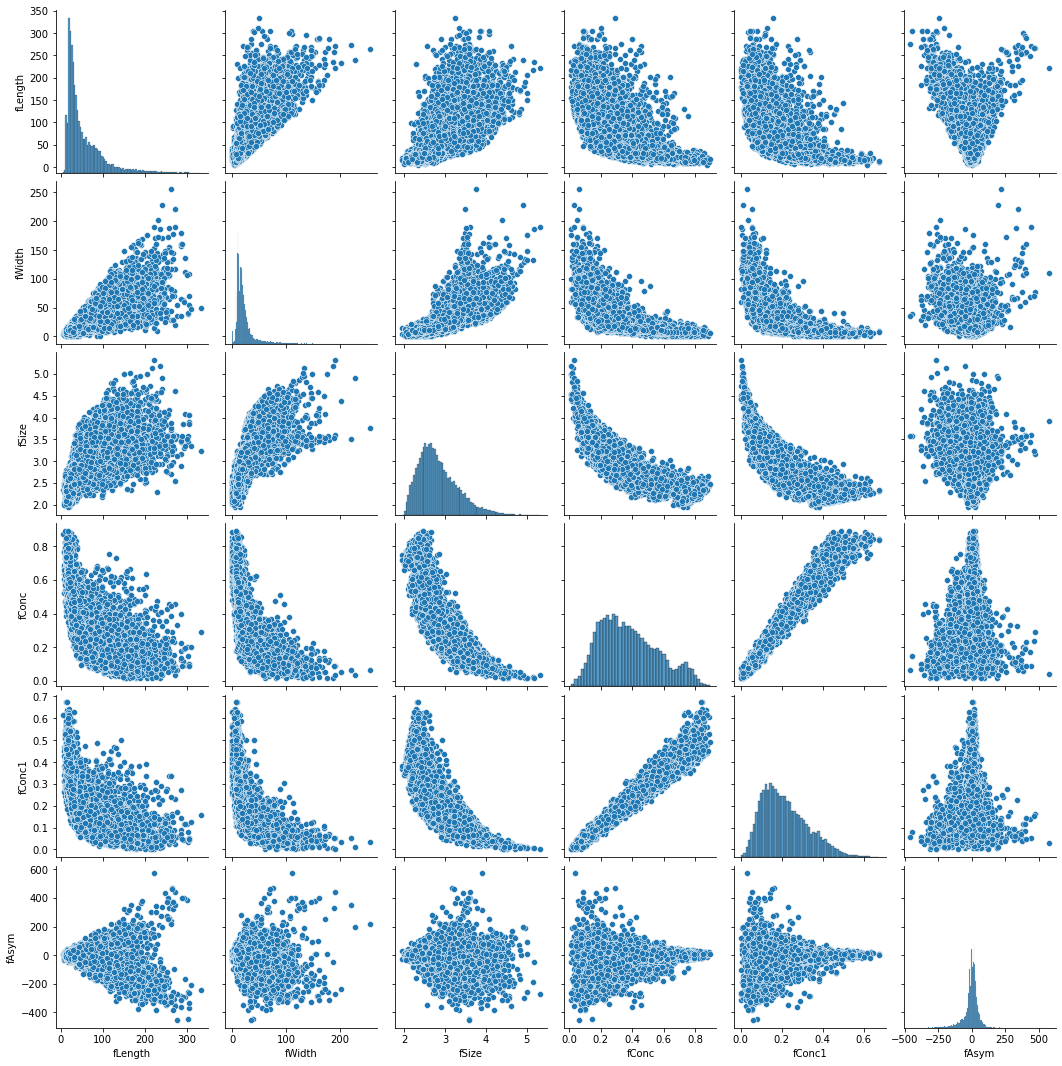

In [178]:
#Plotting:

g=sns.pairplot(data_org)#.set(title='Original data')


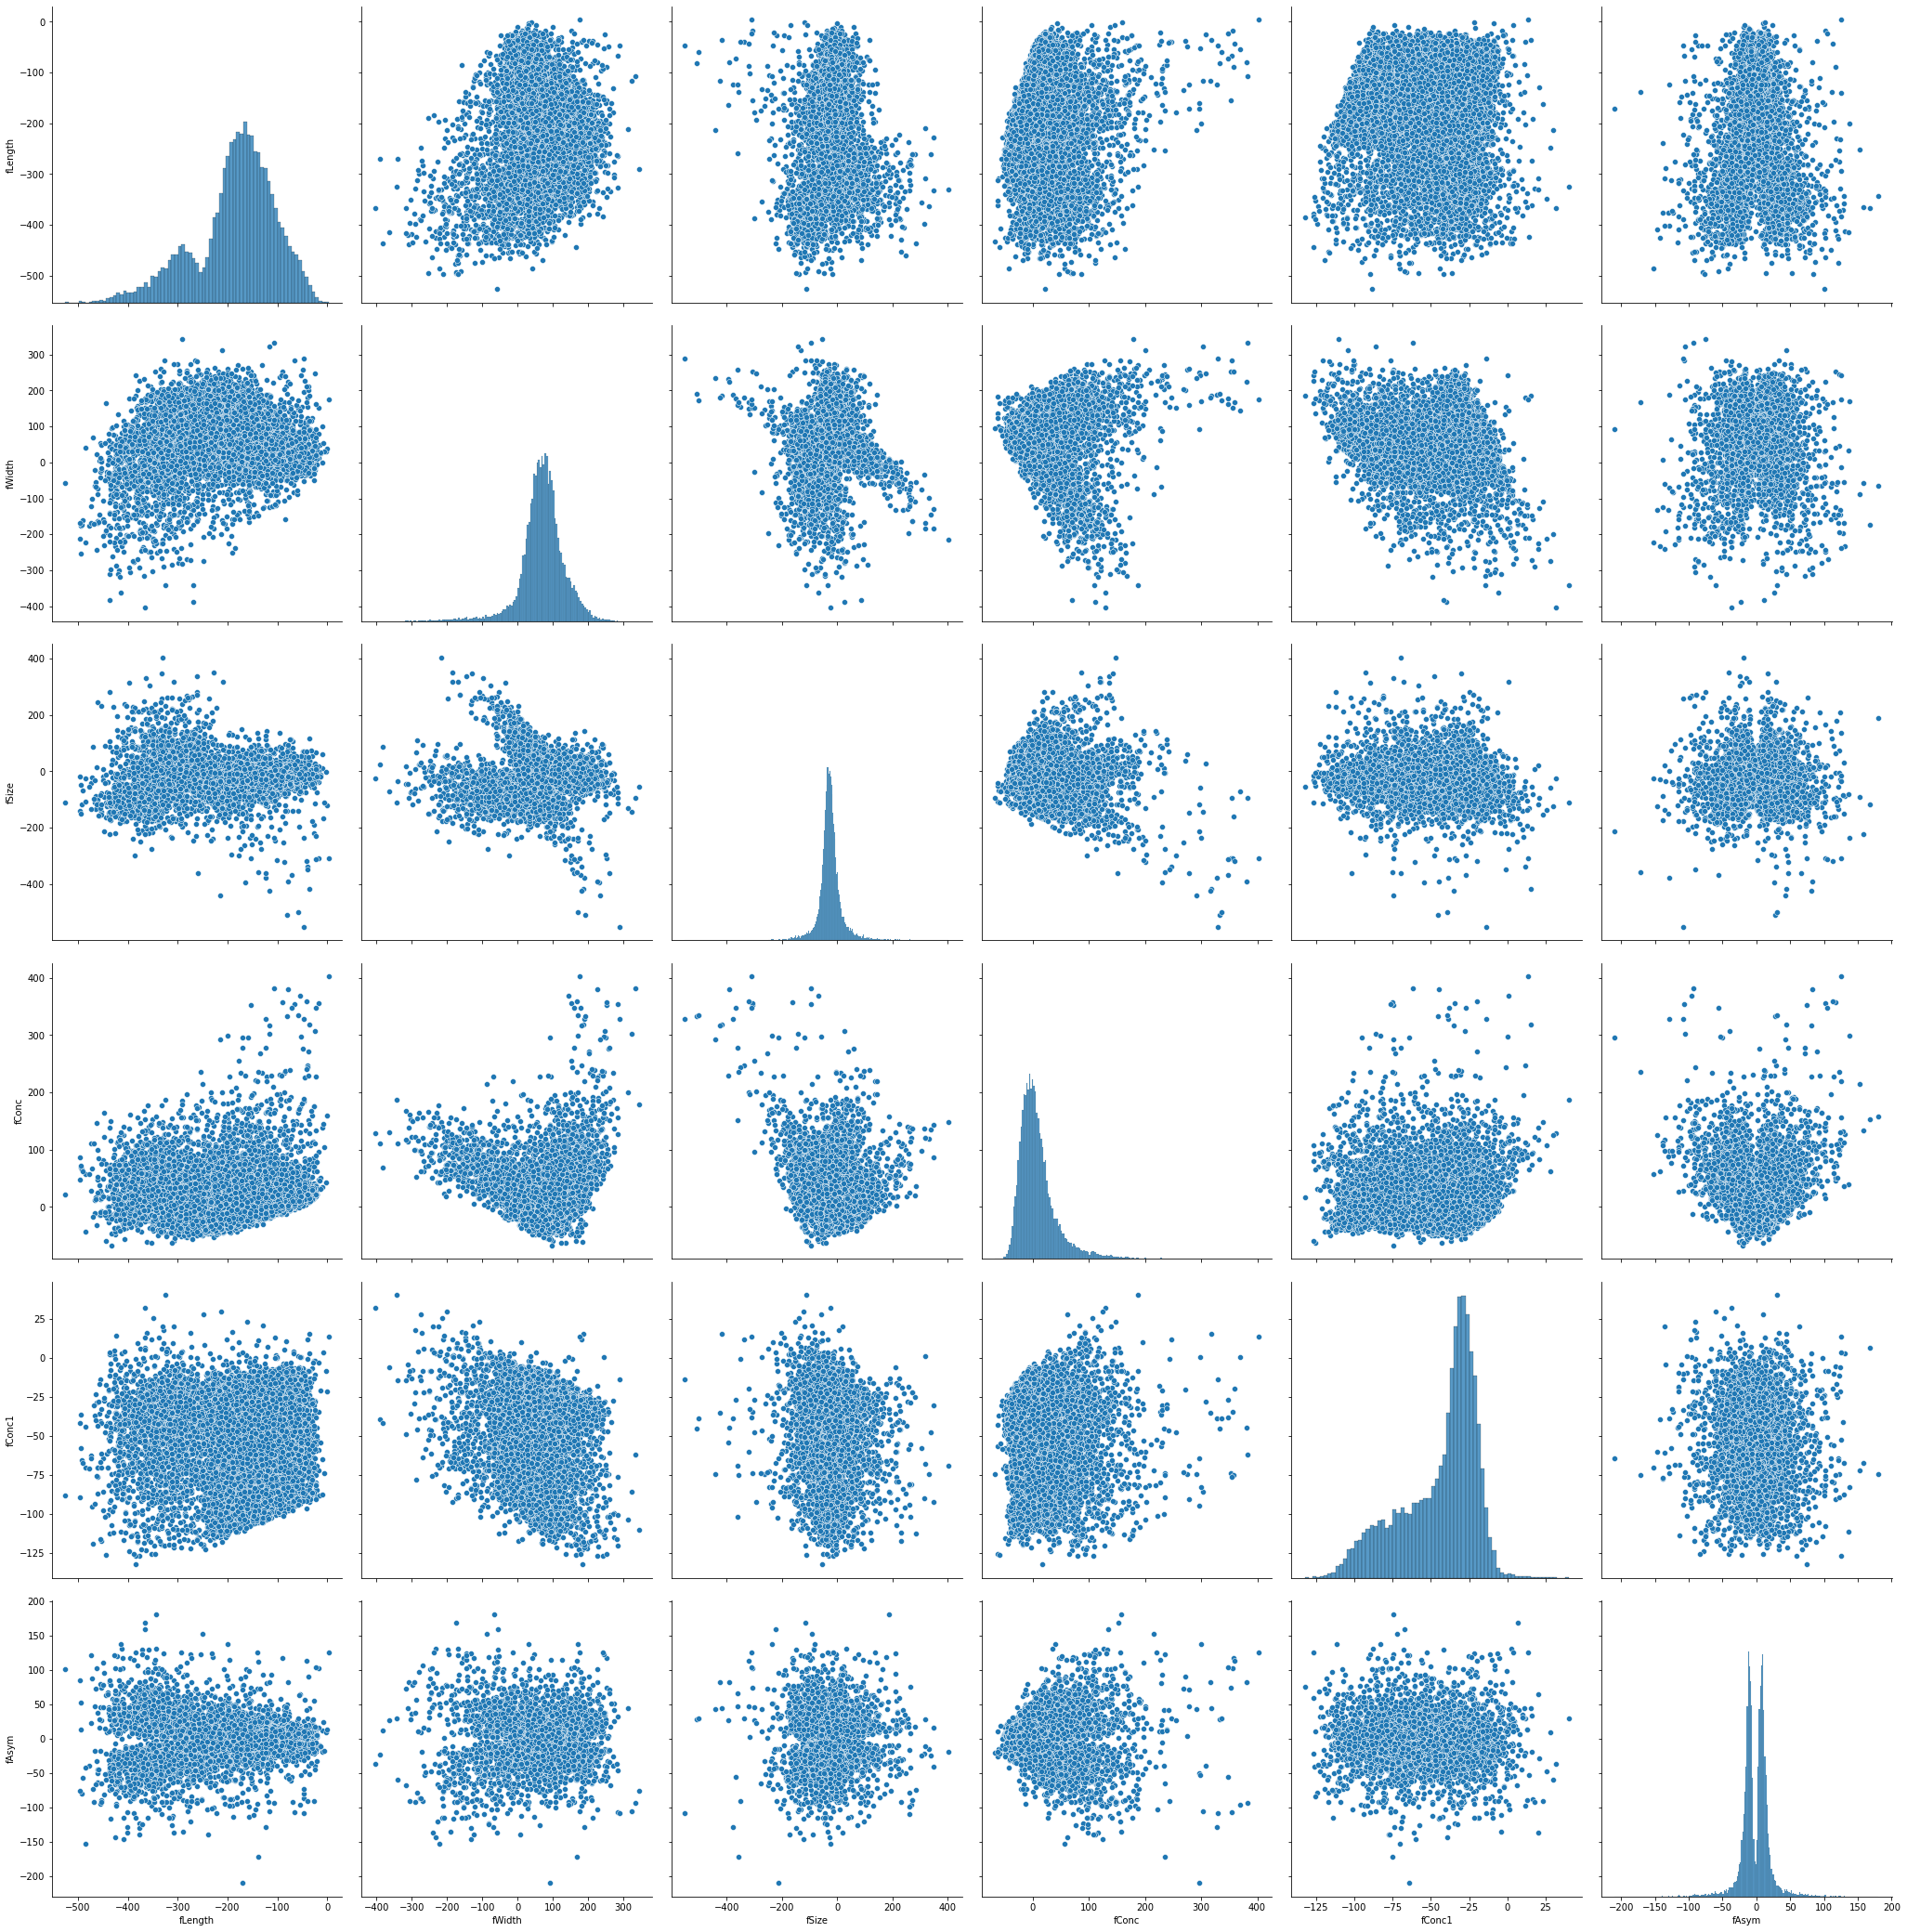

In [179]:
#Rotated data
g = sns.pairplot(data_new)
g.fig.set_figwidth(30)
g.fig.set_figheight(30)
###